In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Xử lý dữ liệu đầu vào

In [32]:
# import dữ liệu
data = pd.read_csv("hw7_cars.csv")
data.isnull().sum()
data.head()

,Price,miles(000),age,miles,year,model
0,15500,24.000,4,24000,2013,Ex-L
1,14000,4.800,3,4800,2014,Ex-L
2,13999,77.254,4,77254,2013,Ex-L
3,10900,40.000,9,40000,2008,Ex-L
4,10500,75.853,5,75853,2012,EX-T


In [33]:
# Xoá cột miles(000)
data = data.drop(columns=["miles(000)"])
data.tail()

,Price,age,miles,year,model
50,4950,12,145000,2005,DX
51,4200,13,132473,2004,DX
52,2500,18,200000,1999,DX
53,2500,14,122000,2003,DX
54,1000,20,196850,1997,DX


In [34]:
# Lưu lại category của cột model
model_categories = data["model"].astype("category").cat.categories
print(model_categories)
### cat.category --> dạng rời rạc
# Đổi dữ liệu cột model thành dạng số
data["model"] = data["model"].astype("category").cat.codes
data.tail()
### cat.codes --> dạng bảng


Index(['DX', 'EX-T', 'Ex-L', 'SE'], dtype='object')


,Price,age,miles,year,model
50,4950,12,145000,2005,0
51,4200,13,132473,2004,0
52,2500,18,200000,1999,0
53,2500,14,122000,2003,0
54,1000,20,196850,1997,0


# Tính hệ số tương quan + heatmap

In [35]:
data.corr()

,Price,age,miles,year,model
Price,1.000000,-0.857075,-0.890479,0.857075,0.571045
age,-0.857075,1.000000,0.779441,-1.000000,-0.603611
miles,-0.890479,0.779441,1.000000,-0.779441,-0.592755
year,0.857075,-1.000000,-0.779441,1.000000,0.603611
model,0.571045,-0.603611,-0.592755,0.603611,1.000000


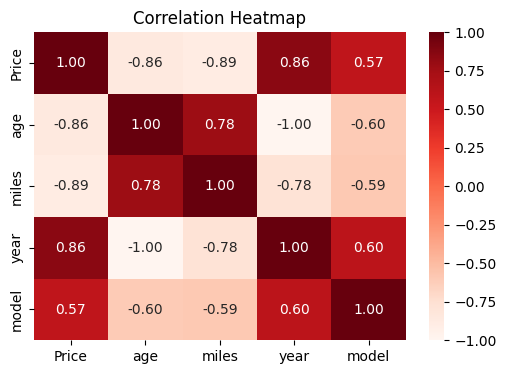

In [36]:
# Vẽ hitmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Xây dựng mô hình <strong>HỒI QUY TUYẾN TÍNH ĐA BIẾN<strong>

In [37]:
# Khai báo mô hình
model = LinearRegression()

# Khai báo Biến độc lập + phụ thuộc
y = data["Price"]
X = data.drop(columns=["Price"])

In [38]:
# Chia tập train: test (70/30)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=38)

In [39]:
# Huấn luyện mô hình
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
# Dự đoán
y_pred = model.predict(X_test)

## Tính chỉ số MSE + R^2 (đánh giá mô hình)

In [49]:
# Đánh gia mô hình (mse, sai số R^2) qua tập test
mse = mean_squared_error(y_true = y_test,y_pred= y_pred)
r2 = model.score(X_test, y_test)
r2_sklearn = r2_score(y_true = y_test, y_pred = y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 (from model.score): {r2:.4f}")
print(f"R2 (from r2_score): {r2_sklearn:.4f}")
# Láy chữ số ở hàng phần chục nghìn




Mean Squared Error: 2578375.0006
R^2 (from model.score): 0.8962
R2 (from r2_score): 0.8962
